#PROJECT TITLE-ICEBERG DETECTION IN SATELLITES

In [1]:
import os
os.getcwd()

'C:\\Users\\br104s\\Desktop\\Remote Internship 2020\\Project\\notebook'

In [2]:
os.chdir('C:/Users/br104s/Desktop/Remote Internship 2020/Project/dataset')

In [3]:
os.getcwd()

'C:\\Users\\br104s\\Desktop\\Remote Internship 2020\\Project\\dataset'

#IMPORTING THE LIBRARIES

In [4]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#DATA VISUALISATION

In [6]:
#lets us visualize some SAR pics of ICEBERG AND SHIPS

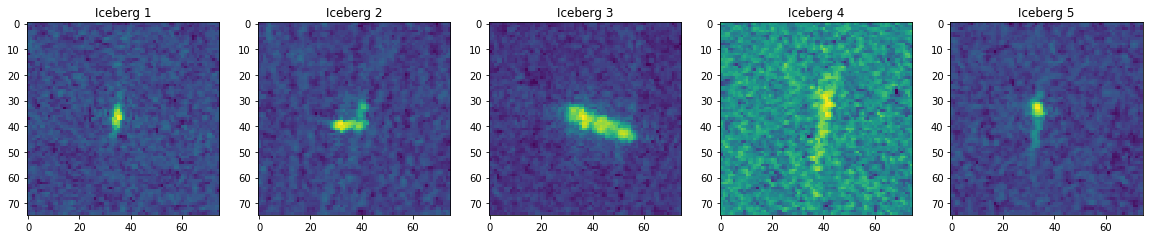

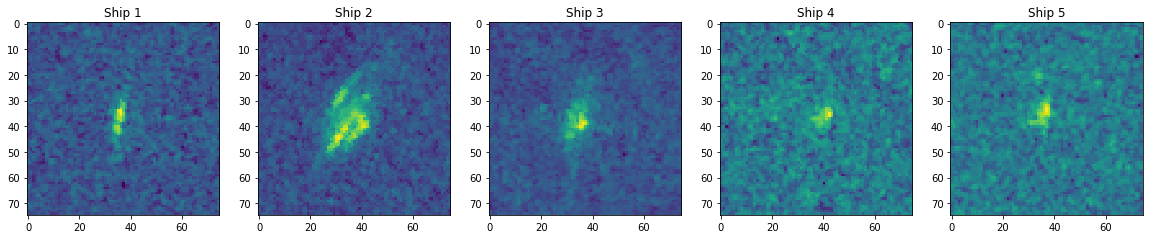

In [7]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

train_ships=[]
train_iceberg=[]
i=0
for img_path in glob.glob('../dataset/train/Ship/*.png'):
    if(i<5):
        train_ships.append(mpimg.imread(img_path))
        i+=1
i=0
for img_path in glob.glob('../dataset/train/Iceberg/*.png'):
    if(i<5):
        train_iceberg.append(mpimg.imread(img_path))
        i+=1
        
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(train_ships):
    plt.subplot(len(train_ships) / columns + 1, columns, i + 1).set_title('Iceberg {}' .format(i+1))
    print
    plt.imshow(image)
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(train_iceberg):
    plt.subplot(len(train_iceberg) / columns + 1, columns, i + 1).set_title('Ship {}' .format(i+1))
    plt.imshow(image)

In [8]:
#Take a look at a iceberg
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
def plotmy3d(c, name):

    data = [
        go.Surface(
            z=c
        )
    ]
    layout = go.Layout(
        title=name,
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)
plotmy3d(train_iceberg[0], 'iceberg')

In [11]:
##Take a look at aShip
plotmy3d(train_ships[0], 'Ship')

#MODEL BUILDING

In [36]:
#Import Keras.
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam

In [13]:
#Intialize the model
model=Sequential()
model.add(Conv2D(64,(3, 3),activation='relu', input_shape=(75, 75, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.2))

In [14]:
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

In [15]:
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

In [16]:
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

In [17]:
#Add Flattening Layer
model.add(Flatten())

In [18]:
#Add Hidden Layer
model.add(Dense(init="uniform",activation="relu",output_dim=512))
model.add(Dropout(0.2))

C:\Users\br104s\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512, kernel_initializer="uniform")`



In [19]:
model.add(Dense(init="uniform",activation="relu",output_dim=256))
model.add(Dropout(0.2))

C:\Users\br104s\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256, kernel_initializer="uniform")`



In [20]:
#Add Output layer
model.add(Dense(init="uniform",activation="sigmoid",output_dim=1))

C:\Users\br104s\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`



In [21]:
#Compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
#Image Augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
x_train = train_datagen.flow_from_directory('train',
                                                 target_size = (75, 75),
                                                 batch_size = 32,
                                                     class_mode = 'binary')
x_test = test_datagen.flow_from_directory('test',
                                            target_size = (75, 75),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 1284 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [24]:
print(x_train.class_indices)

{'Iceberg': 0, 'Ship': 1}


In [25]:
history=model.fit_generator(x_train,
                         steps_per_epoch = 250,
                         epochs = 10,
                         validation_data = x_test,
                         validation_steps = 63)


Epoch 1/10
250/250 [==============================] - 106s 426ms/step - loss: 0.5827 - accuracy: 0.6694 - val_loss: 0.4568 - val_accuracy: 0.8031
Epoch 2/10
250/250 [==============================] - 102s 409ms/step - loss: 0.4453 - accuracy: 0.7886 - val_loss: 0.4539 - val_accuracy: 0.7758
Epoch 3/10
250/250 [==============================] - 98s 392ms/step - loss: 0.3884 - accuracy: 0.8113 - val_loss: 0.2283 - val_accuracy: 0.8710
Epoch 4/10
250/250 [==============================] - 98s 393ms/step - loss: 0.3617 - accuracy: 0.8287 - val_loss: 0.4120 - val_accuracy: 0.8433
Epoch 5/10
250/250 [==============================] - 97s 389ms/step - loss: 0.3164 - accuracy: 0.8553 - val_loss: 0.3347 - val_accuracy: 0.8413
Epoch 6/10
250/250 [==============================] - 98s 392ms/step - loss: 0.3217 - accuracy: 0.8490 - val_loss: 0.3740 - val_accuracy: 0.8810
Epoch 7/10
250/250 [==============================] - 98s 394ms/step - loss: 0.2932 - accuracy: 0.8631 - val_loss: 0.3074 - val

In [26]:
model.save("mymodel1.h5")

In [27]:
score = model.evaluate(x_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 1s 117ms/step
Test loss: 0.3003808259963989
Test accuracy: 0.875


In [28]:
from keras.models import load_model
import numpy as np
import cv2

In [29]:
model = load_model('mymodel.h5')
#model.compile(loss='categorical_crossentropy',
  #                   optimizer='adam',
  #                    metrics=['accuracy'])

from skimage.transform import resize

def detect(frame):
        img = resize(frame,(75,75))
        print(1)
        
        img = np.expand_dims(img,axis=0)
        if(np.max(img)>1):
            img = img/255.0
        prediction = model.predict(img)
        print(prediction)
        prediction = model.predict_classes(img)
        print(prediction)
    


In [30]:
#0 indicates iceberg and 1 indicates ship

In [33]:
frame=cv2.imread(r"C:/Users/br104s/Desktop/Remote Internship 2020/Project/dataset/test/Iceberg/f183.png")
data = detect(frame)

1
[[0.00012598]]
[[0]]


C:\Users\br104s\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning:

The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.

C:\Users\br104s\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.



In [34]:
frame=cv2.imread(r"C:\Users\br104s\Desktop\Remote Internship 2020\Project\dataset\train\Ship\f16.png")
data = detect(frame)

1
[[0.9626087]]
[[1]]


C:\Users\br104s\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning:

The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.

C:\Users\br104s\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

